Work with missing data in a Python notebook

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
from matplotlib import pyplot as plt

In [3]:
df = pd.read_csv('eda_missing_data_dataset1.csv')

In [ ]:
df.head()

,date,center_point_geom,longitude,latitude,number_of_strikes
0,2018-08-01,POINT(-81.6 22.6),-81.6,22.6,48
1,2018-08-01,POINT(-81.1 22.6),-81.1,22.6,32
2,2018-08-01,POINT(-80.9 22.6),-80.9,22.6,118
3,2018-08-01,POINT(-80.8 22.6),-80.8,22.6,69
4,2018-08-01,POINT(-98.4 22.8),-98.4,22.8,44


In [4]:
df.shape

(651646, 5)

In [12]:
df_zip = pd.read_csv('eda_missing_data_dataset2.csv')

In [13]:
df_zip.head()

,date,zip_code,city,state,state_code,center_point_geom,number_of_strikes
0,2018-08-08,3281,Weare,New Hampshire,NH,POINT(-71.7 43.1),1
1,2018-08-14,6488,Heritage Village CDP,Connecticut,CT,POINT(-73.2 41.5),3
2,2018-08-16,97759,"Sisters city, Black Butte Ranch CDP",Oregon,OR,POINT(-121.4 44.3),3
3,2018-08-18,6776,New Milford CDP,Connecticut,CT,POINT(-73.4 41.6),48
4,2018-08-08,1077,Southwick,Massachusetts,MA,POINT(-72.8 42),2


In [14]:
df_zip.shape

(323700, 7)

In [16]:
df_joined = df.merge(df_zip ,how='left' , on=['date','center_point_geom'])

In [17]:
df_joined.head()

,date,center_point_geom,longitude,latitude,number_of_strikes_x,zip_code,city,state,state_code,number_of_strikes_y
0,2018-08-01,POINT(-81.6 22.6),-81.6,22.6,48.0,NaN,NaN,NaN,NaN,NaN
1,2018-08-01,POINT(-81.1 22.6),-81.1,22.6,32.0,NaN,NaN,NaN,NaN,NaN
2,2018-08-01,POINT(-80.9 22.6),-80.9,22.6,118.0,NaN,NaN,NaN,NaN,NaN
3,2018-08-01,POINT(-80.8 22.6),-80.8,22.6,69.0,NaN,NaN,NaN,NaN,NaN
4,2018-08-01,POINT(-98.4 22.8),-98.4,22.8,44.0,NaN,NaN,NaN,NaN,NaN


In [18]:
df_joined.describe()

,longitude,latitude,number_of_strikes_x,zip_code,number_of_strikes_y
count,651646.000000,651645.000000,651645.000000,293239.000000,293239.000000
mean,-90.883626,33.343091,21.469105,57937.259191,25.626486
std,13.687160,7.975927,50.380266,22345.172358,60.313056
min,-133.900000,16.600000,1.000000,1002.000000,1.000000
25%,-102.800000,26.900000,3.000000,38116.000000,3.000000
50%,-90.400000,33.300000,6.000000,59258.000000,6.000000
75%,-80.900000,39.400000,15.000000,78832.000000,16.000000
max,-43.800000,51.700000,2211.000000,99402.000000,2211.000000


In [19]:
df_null_geo = df_joined[pd.isnull(df_joined.state_code)]
df_null_geo.shape

(358407, 10)

In [20]:
df_joined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651646 entries, 0 to 651645
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   date                 651646 non-null  object 
 1   center_point_geom    651646 non-null  object 
 2   longitude            651646 non-null  float64
 3   latitude             651645 non-null  float64
 4   number_of_strikes_x  651645 non-null  float64
 5   zip_code             293239 non-null  float64
 6   city                 293239 non-null  object 
 7   state                293239 non-null  object 
 8   state_code           293239 non-null  object 
 9   number_of_strikes_y  293239 non-null  float64
dtypes: float64(5), object(5)
memory usage: 49.7+ MB


In [21]:
df_null_geo.head()

,date,center_point_geom,longitude,latitude,number_of_strikes_x,zip_code,city,state,state_code,number_of_strikes_y
0,2018-08-01,POINT(-81.6 22.6),-81.6,22.6,48.0,NaN,NaN,NaN,NaN,NaN
1,2018-08-01,POINT(-81.1 22.6),-81.1,22.6,32.0,NaN,NaN,NaN,NaN,NaN
2,2018-08-01,POINT(-80.9 22.6),-80.9,22.6,118.0,NaN,NaN,NaN,NaN,NaN
3,2018-08-01,POINT(-80.8 22.6),-80.8,22.6,69.0,NaN,NaN,NaN,NaN,NaN
4,2018-08-01,POINT(-98.4 22.8),-98.4,22.8,44.0,NaN,NaN,NaN,NaN,NaN


In [22]:
top_missing = df_null_geo[['latitude','longitude','number_of_strikes_x']
            ].groupby(['latitude','longitude']
                      ).sum().sort_values('number_of_strikes_x',ascending=False).reset_index()
top_missing.head(10)

,latitude,longitude,number_of_strikes_x
0,22.4,-84.2,3761.0
1,22.9,-82.9,3140.0
2,22.4,-84.3,2941.0
3,22.5,-84.2,2720.0
4,22.9,-83.0,2706.0
5,22.5,-84.1,2686.0
6,22.3,-81.0,2637.0
7,22.9,-82.4,2601.0
8,22.9,-82.3,2561.0
9,22.3,-84.3,2524.0


In [23]:
import plotly.express as px

fig = px.scatter_geo(top_missing[top_missing.number_of_strikes_x>=300],
                     lat="latitude",
                     lon="longitude",
                     size="number_of_strikes_x")
fig.update_layout(
    title_text = 'Missing data',
)

fig.show()

In [24]:
import plotly.express as px
fig = px.scatter_geo(top_missing[top_missing.number_of_strikes_x>=300],
                     lat="latitude",
                     lon="longitude",
                     size="number_of_strikes_x")
fig.update_layout(
    title_text = 'Missing data',
    geo_scope='usa',
)
fig.show()

In [25]:
data = {'plannet': ['Mercury', 'Venus', 'Earth', 'Mars',
                    'Jupiter', 'Saturn', 'Uranus', 'Neptune'],
      'radius_km': [2440, 6052, 6371, 3390, 69911, 58232,
                      25362, 24622],
        'moons': [0, 0, 1, 2, 80, 83, 27, 14]
        }
df1= pd.DataFrame(data)
df1

,plannet,radius_km,moons
0,Mercury,2440,0
1,Venus,6052,0
2,Earth,6371,1
3,Mars,3390,2
4,Jupiter,69911,80
5,Saturn,58232,83
6,Uranus,25362,27
7,Neptune,24622,14


In [26]:
data = {'planet': ['Mercury', 'Venus', 'Earth', 'Meztli', 'Janssen'],
        'radius_km': [2440, 6052, 6371, 48654, 11959],
        'life?': ['no', 'no', 'yes', 'no', 'yes'],
        }
df2 = pd.DataFrame(data)
df2

,planet,radius_km,life?
0,Mercury,2440,no
1,Venus,6052,no
2,Earth,6371,yes
3,Meztli,48654,no
4,Janssen,11959,yes


In [28]:
merged = df1.merge(df2, how='left', left_on=['plannet', 'radius_km'], right_on=['planet', 'radius_km'])
merged

,plannet,radius_km,moons,planet,life?
0,Mercury,2440,0,Mercury,no
1,Venus,6052,0,Venus,no
2,Earth,6371,1,Earth,yes
3,Mars,3390,2,NaN,NaN
4,Jupiter,69911,80,NaN,NaN
5,Saturn,58232,83,NaN,NaN
6,Uranus,25362,27,NaN,NaN
7,Neptune,24622,14,NaN,NaN


Identify and deal with outliers

In [29]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [30]:
df = pd.read_csv('eda_outliers_dataset1.csv')

In [31]:
df.head(10)

,year,number_of_strikes
0,2020,15620068
1,2019,209166
2,2018,44600989
3,2017,35095195
4,2016,41582229
5,2015,37894191
6,2014,34919173
7,2013,27600898
8,2012,28807552
9,2011,31392058


In [32]:
def readable_numbers(x):

    if x >= 1e6:
        s = '{:1.1f}M'.format(x*1e-6)
    else:
        s = '{:1.0f}K'.format(x*1e-3)
    return s

df['number_of_strikes_readable']=df['number_of_strikes'].apply(readable_numbers)


In [33]:
df.head(10)

,year,number_of_strikes,number_of_strikes_readable
0,2020,15620068,15.6M
1,2019,209166,209K
2,2018,44600989,44.6M
3,2017,35095195,35.1M
4,2016,41582229,41.6M
5,2015,37894191,37.9M
6,2014,34919173,34.9M
7,2013,27600898,27.6M
8,2012,28807552,28.8M
9,2011,31392058,31.4M


In [34]:
print("Mean:" + readable_numbers(np.mean(df['number_of_strikes'])))
print("Median:" + readable_numbers(np.median(df['number_of_strikes'])))

Mean:26.8M
Median:28.3M


<ipython-input-36-0b778b7a9d89>:3: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



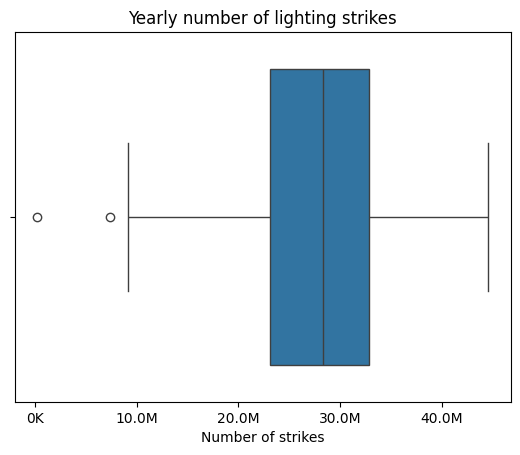

In [36]:
box = sns.boxplot(x=df['number_of_strikes'])
g = plt.gca()
box.set_xticklabels(np.array([readable_numbers(x) for x in g.get_xticks()]))
plt.xlabel('Number of strikes')
plt.title('Yearly number of lighting strikes');

In [37]:
percentile25 = df['number_of_strikes'].quantile(0.25)

percentile75 = df['number_of_strikes'].quantile(0.75)

iqr = percentile75 - percentile25

upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

print('Lower limit is: '+ readable_numbers(lower_limit))

Lower limit is: 8.6M


In [38]:
df[df['number_of_strikes']<lower_limit]

,year,number_of_strikes,number_of_strikes_readable
1,2019,209166,209K
33,1987,7378836,7.4M


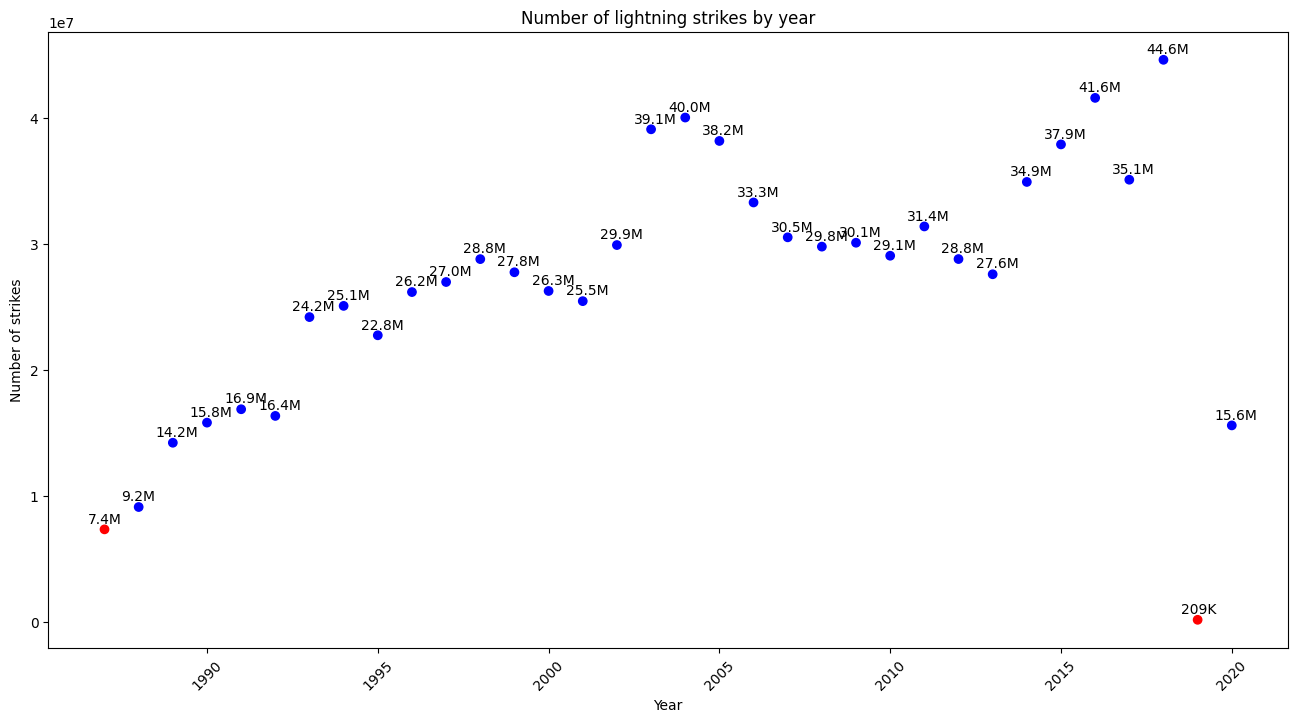

In [39]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(x[i]-0.5, y[i]+500000, s=readable_numbers(y[i]))

colors = np.where(df['number_of_strikes'] < lower_limit, 'r', 'b')

fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df['year'], df['number_of_strikes'],c=colors)
ax.set_xlabel('Year')
ax.set_ylabel('Number of strikes')
ax.set_title('Number of lightning strikes by year')
addlabels(df['year'], df['number_of_strikes'])
for tick in ax.get_xticklabels():
    tick.set_rotation(45)
plt.show()

In [40]:
df_2019 = pd.read_csv('eda_outliers_dataset2.csv')

In [41]:
df_2019.head()

,date,number_of_strikes,center_point_geom
0,2019-12-01,1,POINT(-79.7 35.3)
1,2019-12-01,1,POINT(-84.7 39.3)
2,2019-12-01,1,POINT(-83.4 38.9)
3,2019-12-01,1,POINT(-71.5 35.2)
4,2019-12-01,1,POINT(-87.8 41.6)


In [43]:
df_2019['date']= pd.to_datetime(df_2019['date'])

df_2019['month'] = df_2019['date'].dt.month
df_2019['month_txt'] = df_2019['date'].dt.month_name().str.slice(stop=3)


df_2019_by_month = df_2019.groupby(['month','month_txt'])[['number_of_strikes']].sum().sort_values('month', ascending=True).head(12).reset_index()
df_2019_by_month

,month,month_txt,number_of_strikes
0,12,Dec,209166


In [45]:
#import data for 1987
df_1987 = pd.read_csv('eda_outliers_dataset3.csv')

In [48]:
df_1987['date'] = pd.to_datetime(df_1987['date'])

df_1987['month'] = df_1987['date'].dt.month
df_1987['month_txt'] = df_1987['date'].dt.month_name().str.slice(stop=3)


df_1987_by_month = df_1987.groupby(['month','month_txt'])[['number_of_strikes']].sum().sort_values('month', ascending=True).head(12).reset_index()
df_1987_by_month

,month,month_txt,number_of_strikes
0,1,Jan,9983
1,2,Feb,18353
2,3,Mar,43777
3,4,Apr,49839
4,5,May,328420
5,6,Jun,569428
6,7,Jul,1310137
7,8,Aug,1125041
8,9,Sep,274764
9,10,Oct,27596


In [49]:
df_without_outliers = df[df['number_of_strikes'] >= lower_limit]

print("Mean:" + readable_numbers(np.mean(df_without_outliers['number_of_strikes'])))
print("Median:" + readable_numbers(np.median(df_without_outliers['number_of_strikes'])))

Mean:28.2M
Median:28.8M


Label Encoding

In [68]:
import datetime
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [69]:
df = pd.read_csv('eda_label_encoding_dataset.csv')

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10479003 entries, 0 to 10479002
Data columns (total 3 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   date               object
 1   number_of_strikes  int64 
 2   center_point_geom  object
dtypes: int64(1), object(2)
memory usage: 239.8+ MB


Create a categorical variable strike_level

In [72]:
# Convert `date` column to datetime
df['date'] = pd.to_datetime(df['date'])

# Create new `month` column
df['month'] = df['date'].dt.month_name().str.slice(stop=3)

In [73]:
df.head()

,date,number_of_strikes,center_point_geom,month
0,2016-08-05,16,POINT(-101.5 24.7),Aug
1,2016-08-05,16,POINT(-85 34.3),Aug
2,2016-08-05,16,POINT(-89 41.4),Aug
3,2016-08-05,16,POINT(-89.8 30.7),Aug
4,2016-08-05,16,POINT(-86.2 37.9),Aug


In [74]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']


df['month'] = pd.Categorical(df['month'], categories=months, ordered=True)


df['year'] = df['date'].dt.strftime('%Y')


df_by_month = df.groupby(['year', 'month']).sum(numeric_only=True).reset_index()
df_by_month.head()



<ipython-input-74-c32ad9282dbd>:10: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,year,month,number_of_strikes
0,2016,Jan,313595
1,2016,Feb,312676
2,2016,Mar,2057527
3,2016,Apr,2636427
4,2016,May,5800500


In [75]:
# Create a new column that categorizes number_of_strikes into 1 of 4 categories
df_by_month['strike_level'] = pd.qcut(
    df_by_month['number_of_strikes'],
    4,
    labels = ['Mild', 'Scattered', 'Heavy', 'Severe'],)
df_by_month.head()

,year,month,number_of_strikes,strike_level
0,2016,Jan,313595,Mild
1,2016,Feb,312676,Mild
2,2016,Mar,2057527,Scattered
3,2016,Apr,2636427,Heavy
4,2016,May,5800500,Severe


Encode strike_level into numerical values

In [77]:
df_by_month['strike_level_code'] = df_by_month['strike_level'].cat.codes
df_by_month.head()

,year,month,number_of_strikes,strike_level,strike_level_code
0,2016,Jan,313595,Mild,0
1,2016,Feb,312676,Mild,0
2,2016,Mar,2057527,Scattered,1
3,2016,Apr,2636427,Heavy,2
4,2016,May,5800500,Severe,3


In [78]:
pd.get_dummies(df_by_month['strike_level'])

,Mild,Scattered,Heavy,Severe
0,True,False,False,False
1,True,False,False,False
2,False,True,False,False
3,False,False,True,False
4,False,False,False,True
5,False,False,False,True
6,False,False,False,True
7,False,False,False,True
8,False,False,True,False
9,False,True,False,False


Create a heatmap of number of strikes per month

In [79]:
df_by_month_plot = df_by_month.pivot(index='year', columns='month', values='strike_level_code')
df_by_month_plot.head()

month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
2016,0,0,1,2,3,3,3,3,2,1,0,0
2017,1,0,1,2,2,2,3,3,2,1,0,0
2018,1,2,1,1,2,3,3,3,2,1,0,0


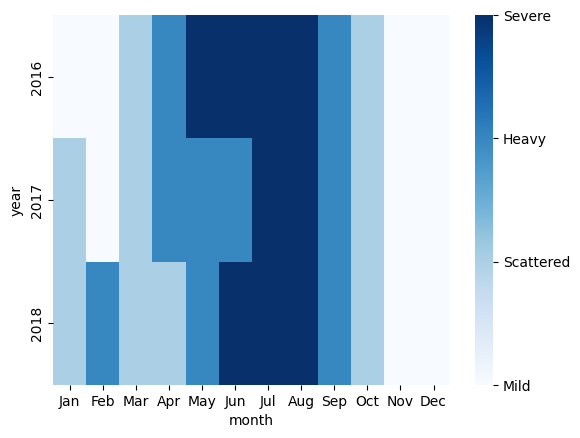

In [80]:
ax = sns.heatmap(df_by_month_plot, cmap = 'Blues')
colorbar = ax.collections[0].colorbar
colorbar.set_ticks([0, 1, 2, 3])
colorbar.set_ticklabels(['Mild', 'Scattered', 'Heavy', 'Severe'])
plt.show()

Input Validation

In [81]:
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import seaborn as sns

In [83]:
df = pd.read_csv('eda_input_validation_joining_dataset1 (1).csv')

In [84]:
df.head()

,date,number_of_strikes,center_point_geom,longitude,latitude
0,2018-01-03,194,POINT(-75 27),-75.0,27.0
1,2018-01-03,41,POINT(-78.4 29),-78.4,29.0
2,2018-01-03,33,POINT(-73.9 27),-73.9,27.0
3,2018-01-03,38,POINT(-73.8 27),-73.8,27.0
4,2018-01-03,92,POINT(-79 28),-79.0,28.0


In [85]:
print(df.dtypes)

date                  object
number_of_strikes      int64
center_point_geom     object
longitude            float64
latitude             float64
dtype: object


In [86]:
df['date'] = pd.to_datetime(df['date'])

In [87]:
df.isnull().sum()

,0
date,0
number_of_strikes,0
center_point_geom,0
longitude,0
latitude,0


In [88]:
df.describe(include = 'all')

,date,number_of_strikes,center_point_geom,longitude,latitude
count,3401012,3.401012e+06,3401012,3.401012e+06,3.401012e+06
unique,NaN,NaN,170855,NaN,NaN
top,NaN,NaN,POINT(-81.5 22.5),NaN,NaN
freq,NaN,NaN,108,NaN,NaN
mean,2018-07-13 03:32:02.018504960,1.311403e+01,NaN,-9.081778e+01,3.374688e+01
min,2018-01-01 00:00:00,1.000000e+00,NaN,-1.418000e+02,1.660000e+01
25%,2018-06-04 00:00:00,2.000000e+00,NaN,-1.008000e+02,2.760000e+01
50%,2018-07-18 00:00:00,4.000000e+00,NaN,-9.070000e+01,3.350000e+01
75%,2018-08-24 00:00:00,1.200000e+01,NaN,-8.130000e+01,3.970000e+01
max,2018-12-31 00:00:00,2.211000e+03,NaN,-4.320000e+01,5.170000e+01


In [89]:
full_date_range = pd.date_range(start='2018-01-01', end='2018-12-31')


full_date_range.difference(df['date'])

DatetimeIndex(['2018-06-19', '2018-06-20', '2018-06-21', '2018-06-22',
               '2018-09-18', '2018-09-19', '2018-12-01', '2018-12-02'],
              dtype='datetime64[ns]', freq=None)

Validate number_of_strikes column

<Axes: ylabel='number_of_strikes'>

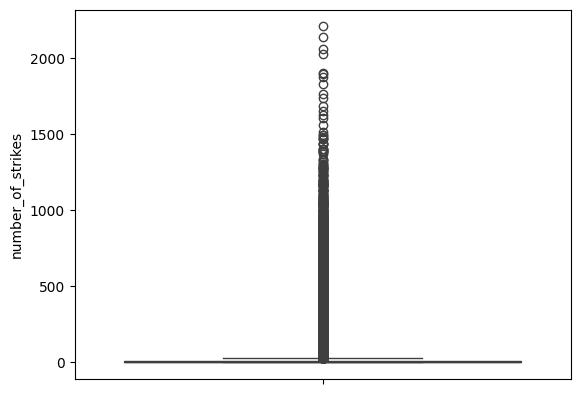

In [90]:
sns.boxplot(y = df['number_of_strikes'])

<Axes: ylabel='number_of_strikes'>

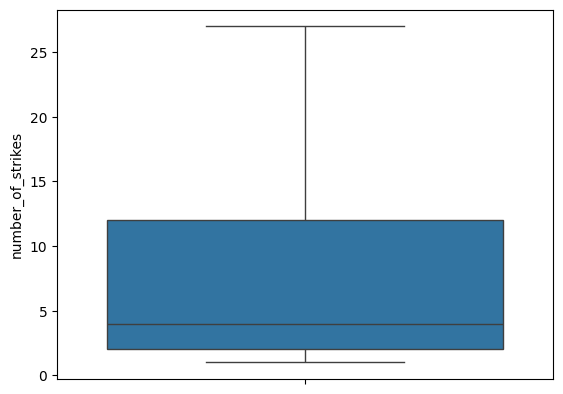

In [91]:
sns.boxplot(y = df['number_of_strikes'], showfliers=False)

Validate latitude and longitude columns

In [92]:
df_points = df[['latitude', 'longitude']].drop_duplicates()
df_points.head()

,latitude,longitude
0,27.0,-75.0
1,29.0,-78.4
2,27.0,-73.9
3,27.0,-73.8
4,28.0,-79.0


In [93]:
p = px.scatter_geo(df_points, lat = 'latitude', lon = 'longitude')
p.show()